In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
train = pd.read_csv('./assets/train.csv')
test = pd.read_csv('./assets/test.csv')
weather = pd.read_csv('./assets/weather.csv')
spray = pd.read_csv('./assets/spray.csv')

# Weather - Joining

In [3]:
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [4]:
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])

In [5]:
weather['AvgSpeed'] =weather['AvgSpeed'].astype('float64')
weather['SeaLevel'] =weather['SeaLevel'].astype('float64')
weather['StnPressure'] =weather['StnPressure'].astype('float64')
weather['PrecipTotal'] =weather['PrecipTotal'].astype('float64')
weather['SnowFall'] =weather['SnowFall'].astype('float64')
weather['Depth'] =weather['Depth'].astype('float64')
#weather['CodeSum'] =weather['CodeSum'].astype('float64')
weather['SnowFall'] =weather['SnowFall'].astype('float64')
weather['Sunset'] =weather['Sunset'].astype('float64')
weather['Sunrise'] =weather['Sunrise'].astype('float64')
weather['Cool'] =weather['Cool'].astype('float64')
weather['Heat'] =weather['Heat'].astype('float64')
weather['Depart'] =weather['Depart'].astype('float64')
weather['WetBulb'] =weather['WetBulb'].astype('float64')
weather['Tavg'] =weather['Tavg'].astype('float64')

In [6]:
station = [[41.995,-87.933],[41.786,-87.752 ]]

from scipy.spatial.distance import cdist
def closest_station(point):
    p= station[cdist(point, station).argmin()]
    
    if (p== [41.995,-87.933]):
           return 1
    return 2

train['Station'] = [closest_station([x])  for x in train[['Latitude','Longitude']].values]



In [7]:
train['Tmax10Avg'] = ""
train['Tmin10Avg'] = ""
train['Tavg10Avg'] = ""
train['WetBulb10Avg'] =""
train['Heat10Avg'] =""
train['Cool10Avg'] =""
train['SnowFall10Avg'] =""


train['Tmax10Max'] = ""
train['Tmin10Max'] = ""
train['Tavg10Max'] = ""
train['WetBulb10Max'] =""
train['Heat10Max'] =""
train['Cool10Max'] =""
train['SnowFall10Max'] =""


train['Tmax'] = ""
train['Tmin'] = ""
train['Tavg'] = ""
train['WetBulb'] =""
train['Heat'] =""
train['Cool'] =""
train['SnowFall'] =""

In [8]:
def add_weather_data_10mean_days(ind,weather):
    train_date = train.ix[ind,'Date']
    train_stn = train.ix[ind,'Station']
    rs=weather.loc[(weather['Date'] >=train_date - pd.Timedelta('10 days')) & 
            (weather['Date'] <=train_date) & (weather['Station']==train_stn)
                   ,
            ('Tmax','Tmin','Tavg','WetBulb','Heat','Cool','SnowFall') ].mean().astype('float64')
    #rs1=weather.loc[(weather['Date'] >=train_date - pd.Timedelta('10 days')) & 
    #        (weather['Date'] <=train_date) & (weather['Station']==train_stn)
    #                ,
    #        ('WetBulb','Heat','Cool','SnowFall') ].max().astype('float64')
    #rs.append(rs1)
    return rs

def add_weather_data_10max_days(ind,weather):
    train_date = train.ix[ind,'Date']
    train_stn = train.ix[ind,'Station']
    rs=weather.loc[(weather['Date'] >=train_date - pd.Timedelta('10 days')) & 
            (weather['Date'] <=train_date) & (weather['Station']==train_stn)
                   ,
            ('Tmax','Tmin','Tavg','WetBulb','Heat','Cool','SnowFall') ].max().astype('float64')
    return rs
    
def add_weather_data_day(ind,weather):
    train_date = train.ix[ind,'Date']
    train_stn = train.ix[ind,'Station']
    rs=weather.loc[(weather['Date'] ==train_date)  & (weather['Station']==train_stn)
                   ,
            ('Tmax','Tmin','Tavg','WetBulb','Heat','Cool','SnowFall') ].mean().astype('float64')
    return rs

In [9]:
for index, row in train.iterrows():
    rs= add_weather_data_10mean_days(index,weather)
    train.loc[(index), 'Tmax10Avg'] = rs['Tmax']
    train.loc[(index), 'Tmin10Avg'] = rs['Tmin']
    train.loc[(index), 'Tavg10Avg'] = rs['Tavg']
    train.loc[(index), 'WetBulb10Avg'] = rs['WetBulb']
    train.loc[(index), 'Heat10Avg'] = rs['Heat']
    train.loc[(index), 'Cool10Avg'] = rs['Cool']
    train.loc[(index), 'SnowFall10Avg'] = rs['SnowFall']
    
    
    
    
for index, row in train.iterrows():
    rs= add_weather_data_10max_days(index,weather)
    train.loc[(index), 'Tmax10Max'] = rs['Tmax']
    train.loc[(index), 'Tmin10Max'] = rs['Tmin']
    train.loc[(index), 'Tavg10Max'] = rs['Tavg']
    train.loc[(index), 'WetBulb10Max'] = rs['WetBulb']
    train.loc[(index), 'Heat10Max'] = rs['Heat']
    train.loc[(index), 'Cool10Max'] = rs['Cool']
    train.loc[(index), 'SnowFall10Max'] = rs['SnowFall']
    
    
for index, row in train.iterrows():
    rs= add_weather_data_day(index,weather)
    train.loc[(index), 'Tmax'] = rs['Tmax']
    train.loc[(index), 'Tmin'] = rs['Tmin']
    train.loc[(index), 'Tavg'] = rs['Tavg']
    train.loc[(index), 'WetBulb'] = rs['WetBulb']
    train.loc[(index), 'Heat'] = rs['Heat']
    train.loc[(index), 'Cool'] = rs['Cool']
    train.loc[(index), 'SnowFall'] = rs['SnowFall']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\P

# Spray - Joining 

In [10]:
import geopandas as gpd
from shapely.geometry import Point,polygon
import matplotlib.pyplot as plt

street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
#fig,ax = plt.subplots(figsize=(15,15))
#street_map.plot(ax=ax)

In [11]:
spray['Latitude'] =spray['Latitude'].astype('float64')
spray['Longitude'] =spray['Longitude'].astype('float64')

In [12]:
crs = {'init': 'epsg:3395'}
geometry = [Point(xy) for xy in zip(train['Longitude'],train['Latitude'])]
geo_df = gpd.GeoDataFrame(train,crs=crs,geometry=geometry)



In [13]:
s=spray[spray['Latitude'] < 42.1]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)


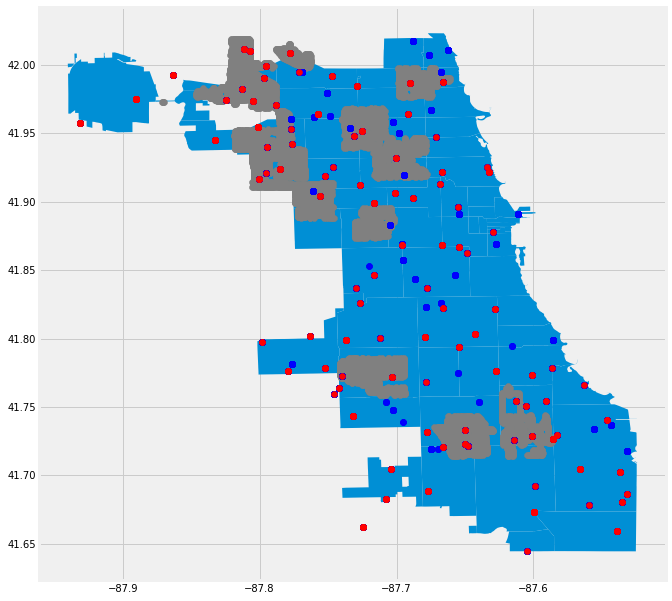

In [14]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax)
geo_df1.plot(ax=ax,color='grey')
geo_df[geo_df['WnvPresent']==0].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1].plot(ax=ax,color='red',label='pos')


In [59]:
spray[spray['Date']>'2013-01-01']['Date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
Name: Date, dtype: int64

## July 3rd week

In [108]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-07-14') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-07-22')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

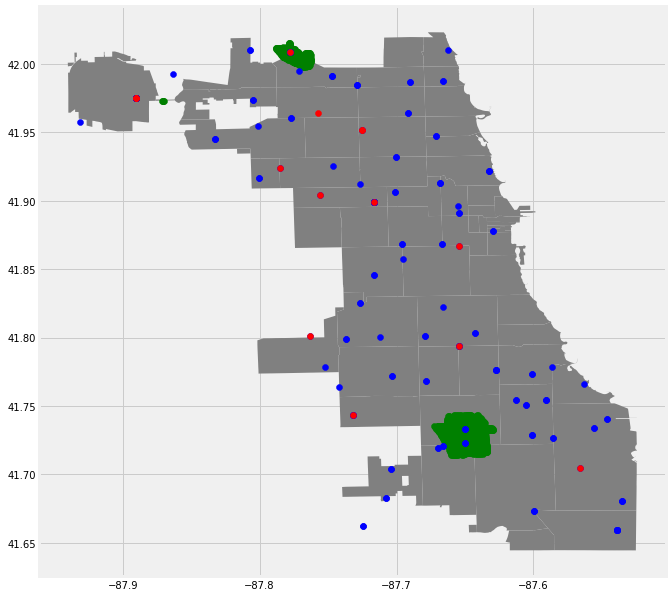

In [109]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-07-14') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-07-22')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-07-14') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-07-22')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_07_3rd.png')

In [113]:
geo_df.groupby(['Trap','WnvPresent','Date'])['NumMosquitos'].sum()

Trap  WnvPresent  Date      
T001  0           2007-06-26      1
                  2007-07-11      1
                  2007-07-18      1
                  2007-08-01      4
                  2007-08-07      2
                  2007-08-15     10
                  2007-08-21      1
                  2007-08-24      2
                  2007-09-12      1
                  2007-10-04      2
T002  0           2007-05-29      2
                  2007-06-05      9
                  2007-06-26      6
                  2007-06-29      2
                  2007-07-02      5
                  2007-07-11     27
                  2007-07-18     13
                  2007-07-27     35
                  2007-08-01    108
                  2007-08-07     26
                  2007-08-15     35
                  2007-08-21     47
                  2007-08-24     35
                  2007-09-12      2
                  2007-09-18     41
                  2007-09-24     74
                  2007-10-04     82

## July 4th Week

In [101]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-07-21') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-07-28')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

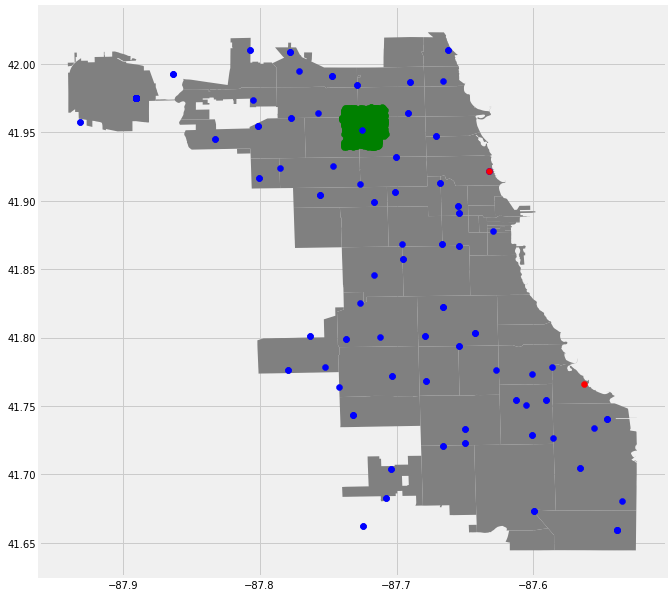

In [102]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-07-21') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-07-28')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-07-21') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-07-28')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_07_4th.png')

## Aug 1st Week

In [81]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-07-29') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-08-05')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\plotting.py:487: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


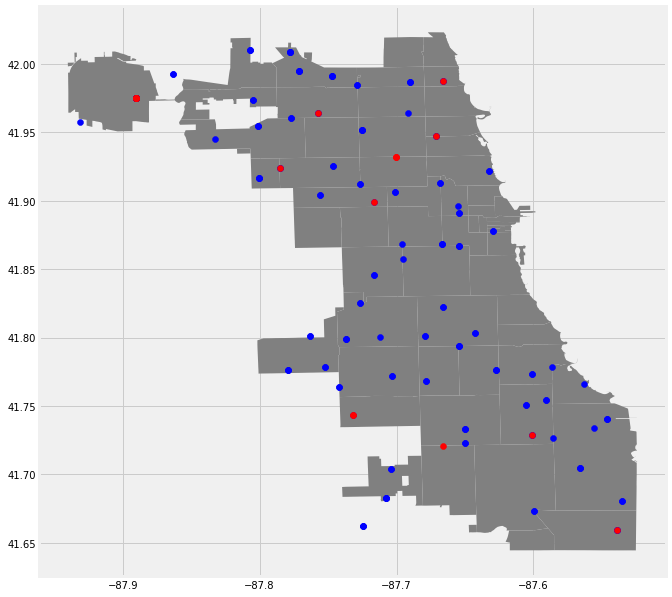

In [83]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-07-29') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-08-05')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-07-29') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-08-05')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_08_1st.png')

## Aug 2nd Week

In [91]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-08-05') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-08-12')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

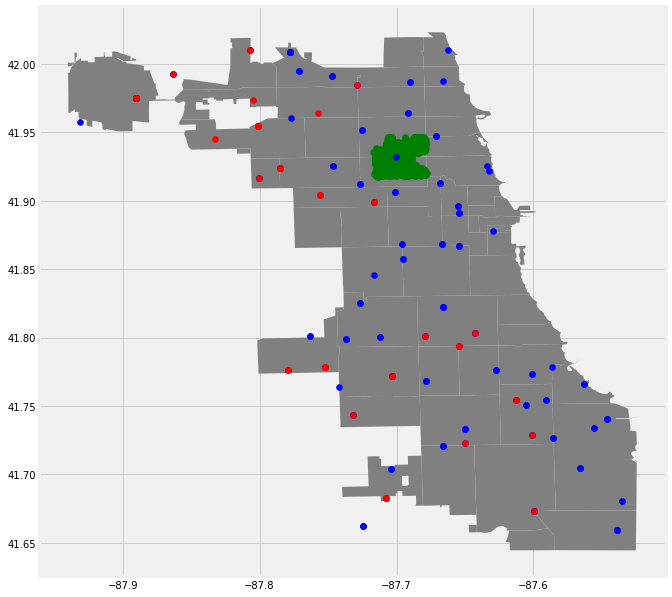

In [92]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-08-05') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-08-12')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-08-05') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-08-12')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_08_2nd.png')

## Aug 3rd Week

In [89]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-08-12') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-08-19')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

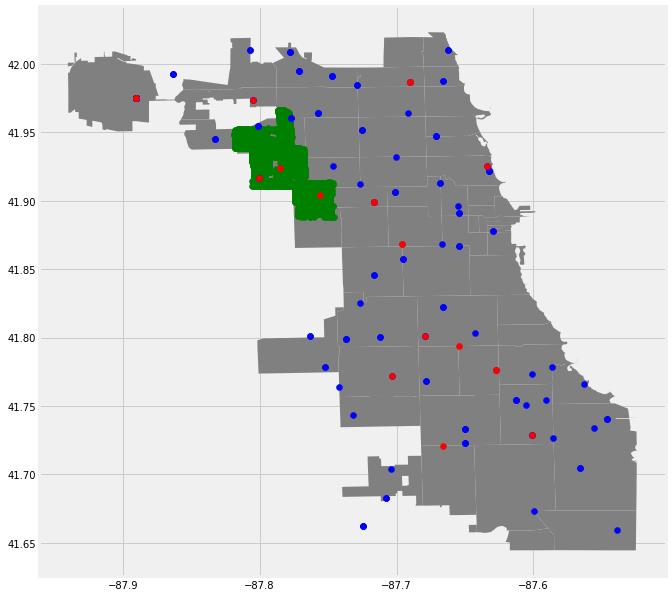

In [90]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-08-12') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-08-19')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-08-12') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-08-19')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_08_3rd.png')

## Aug 4th Week

In [93]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-08-19') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-08-26')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

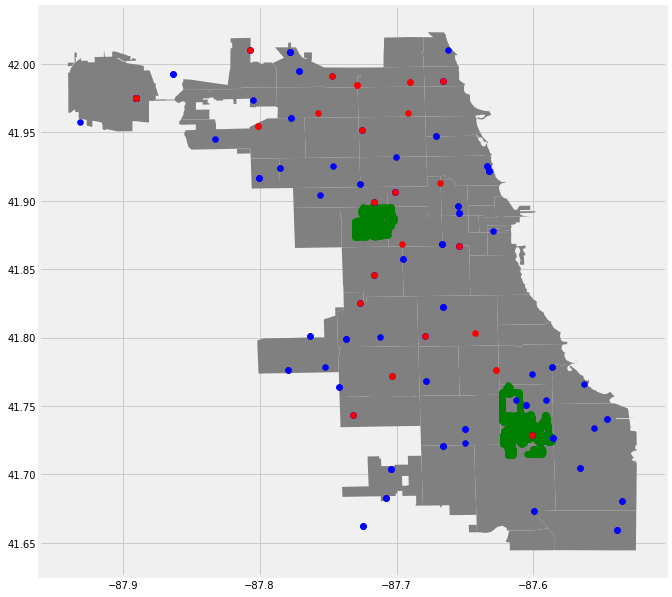

In [94]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-08-19') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-08-26')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-08-19') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-08-26')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_08_4th.png')

## Sep 1st Week

In [95]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-08-26') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-09-02')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

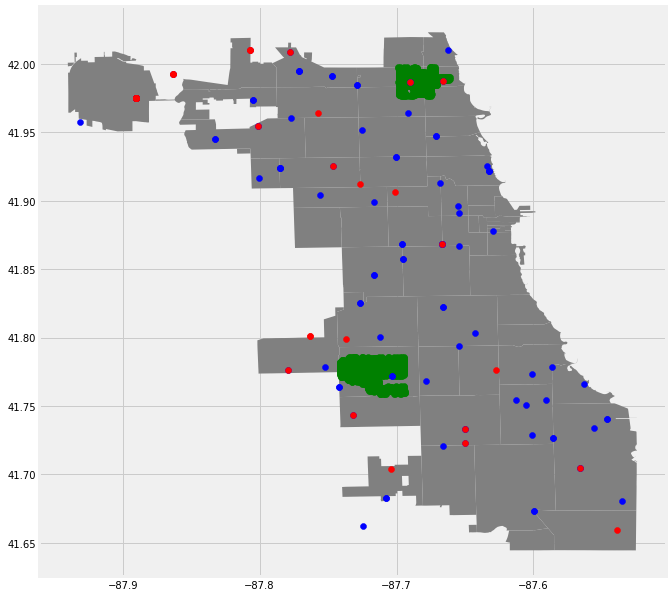

In [96]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-08-26') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-09-02')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-08-26') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-09-02')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_09_1st.png')

## Sep 2nd week

In [97]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-09-02') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-09-09')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

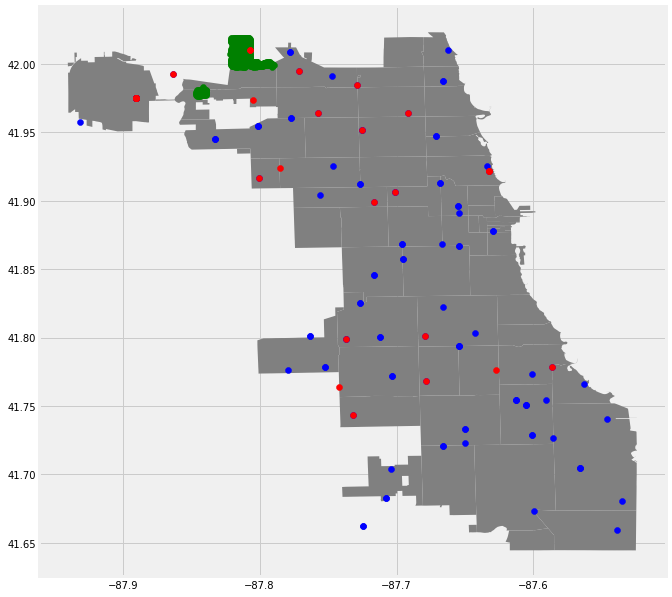

In [98]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax,color='grey')
geo_df1.plot(ax=ax,color='green')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-09-02') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-09-09')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-09-02') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-09-09')].plot(ax=ax,color='red',label='pos')
plt.savefig('2013_09_2nd.png')

In [34]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-08-01') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-08-01')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

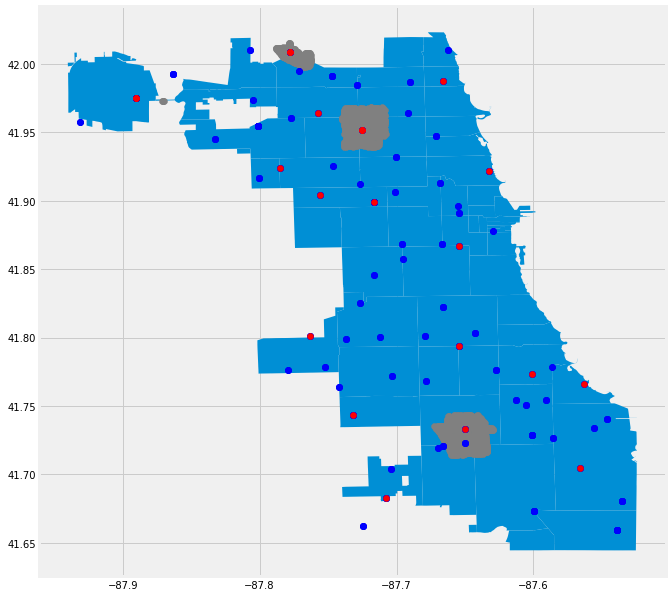

In [35]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax)
geo_df1.plot(ax=ax,color='grey')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-07-01') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-08-01')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-07-01') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-08-01')].plot(ax=ax,color='red',label='pos')
plt.savefig('graph1.png')

In [41]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-08-01') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-09-01')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

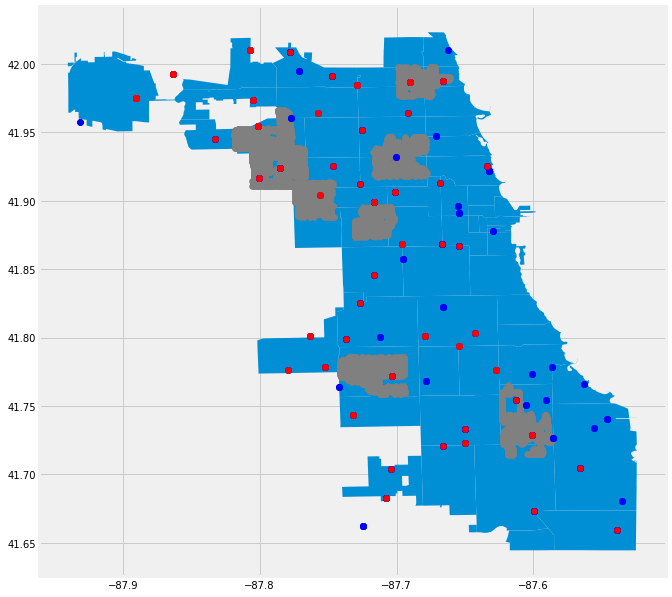

In [42]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax)
geo_df1.plot(ax=ax,color='grey')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-08-01') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-09-01')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-08-01') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-09-01')].plot(ax=ax,color='red',label='pos')
plt.savefig('graph2.png')

In [43]:
s = spray[spray['Latitude'] < 42.1][(spray[spray['Latitude'] < 42.1]['Date']>'2013-09-01') & (spray[spray['Latitude'] < 42.1]['Date']<'2013-10-01')]
geometry1 = [Point(xy) for xy in zip(s['Longitude'],s['Latitude'])]
geo_df1 = gpd.GeoDataFrame(s,crs=crs,geometry=geometry1)

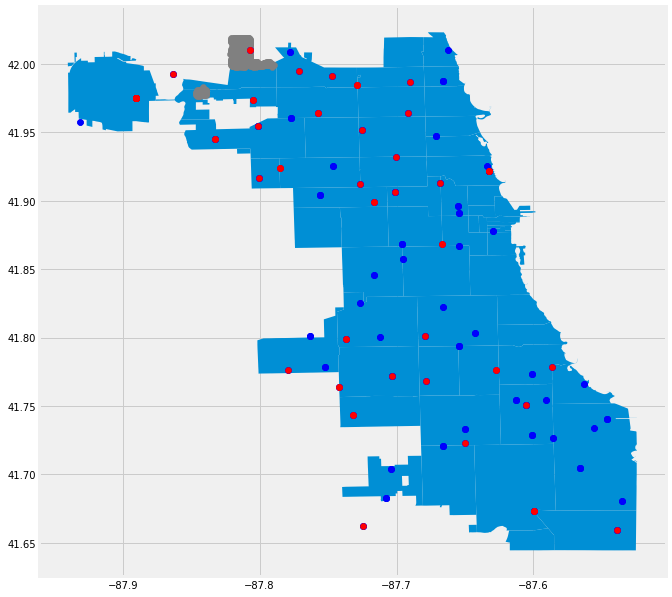

In [44]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax)
geo_df1.plot(ax=ax,color='grey')
geo_df[geo_df['WnvPresent']==0][(geo_df[geo_df['WnvPresent']==0]['Date']>'2013-09-01') & (geo_df[geo_df['WnvPresent']==0]['Date']<'2013-10-01')].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1][(geo_df[geo_df['WnvPresent']==1]['Date']>'2013-09-01') & (geo_df[geo_df['WnvPresent']==1]['Date']<'2013-10-01')].plot(ax=ax,color='red',label='pos')
plt.savefig('graph3.png')

In [323]:
from shapely.ops import nearest_points
from shapely.geometry import Point, MultiPoint


a =[nearest_points(t, MultiPoint(geo_df1['geometry'].values))  for t in geo_df['geometry'].head(30).values]

#geo_df1['shape'] = geo_df1['geometry'].values

#geo_df1.loc[geo_df1['geometry'].isin(a)]
g= pd.DataFrame([a[0][0],a[0][1],geo_df['geometry'].head(1)])


In [324]:
# Returns the distance between the two points in Km

def haversine(lat1, lon1, lat2, lon2, to_radians=False, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [325]:
spray['dist'] = [haversine(x,y,42.391623, -88.089163) for x,y in zip(spray['Latitude'],spray['Longitude'])]

In [343]:
for index, row in train.iterrows():
    x1=row['Latitude']
    x2=row['Longitude']
    train_date=row['Date']
    s=spray.loc[(spray['Date'] <= train_date - pd.Timedelta('1 day')) & 
                (spray['Date'] >= train_date - pd.Timedelta('5 days'))]
    s['dist'] = [haversine(x,y,x1, x2) for x,y in zip(s['Latitude'],s['Longitude'])]
    train.loc[(index), 'Spray_1_5'] = s[s['dist'] < 2.1].Date.count() 

    s=spray.loc[(spray['Date'] <= train_date - pd.Timedelta('6 day')) & 
                (spray['Date'] >= train_date - pd.Timedelta('50 days'))]
    s['dist'] = [haversine(x,y,x1, x2) for x,y in zip(s['Latitude'],s['Longitude'])]
    train.loc[(index), 'Spray_5_50'] = s[s['dist'] < 2.1].Date.count()

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [109]:
train['trapmod'] = train.Trap.str[1:4]
train['trapmod'] =train['trapmod'].astype('float64')

In [79]:
train['Tmax10Avg'] =train['Tmax10Avg'].astype('float64')
train['Tmin10Avg'] =train['Tmin10Avg'].astype('float64')
train['Tavg10Avg'] =train['Tavg10Avg'].astype('float64')
train['WetBulb10Avg'] =train['WetBulb10Avg'].astype('float64')
train['Heat10Avg'] =train['Heat10Avg'].astype('float64')
train['Cool10Avg'] =train['Cool10Avg'].astype('float64')
train['SnowFall10Avg'] =train['SnowFall10Avg'].astype('float64')



In [219]:


train['Zipcode']= train.Address.apply(lambda x: x.split(",")[3].lstrip().replace("IL ","") if
                                     (x.split(",")[2].lstrip().replace("IL ","") == 'Chicago') else
                                     x.split(",")[2].lstrip().replace("IL ",""))

train['Zipcode']= train.Zipcode.apply(lambda x: 0 if (x=='IL') else x)
train['Zipcode']= train.Zipcode.apply(lambda x: 0 if (x=='USA') else x)


train['Zipcode'] =train['Zipcode'].astype('int64')

pd.options.display.max_colwidth = 500

train['Zipcode'].value_counts()

train[train['Zipcode']=='USA'].Address

#train['Zipcode'] =train[train['Zipcode']=='Chicago'].Address.apply(lambda x: x.split(",")[3].lstrip().replace("IL ",""))



/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Series([], Name: Address, dtype: object)

In [248]:
train = pd.get_dummies(train, columns=['Zipcode'], prefix = ['Zipcode'])

In [249]:
train.columns.values

array(['Date', 'Address', 'Species', 'Block', 'Street',
       'AddressNumberAndStreet', 'Latitude', 'Longitude',
       'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Station',
       'Tmax10Avg', 'Tmin10Avg', 'Tavg10Avg', 'WetBulb10Avg', 'Heat10Avg',
       'Cool10Avg', 'SnowFall10Avg', 'Tmax10Max', 'Tmin10Max',
       'Tavg10Max', 'WetBulb10Max', 'Heat10Max', 'Cool10Max',
       'SnowFall10Max', 'Tmax', 'Tmin', 'Tavg', 'WetBulb', 'Heat', 'Cool',
       'SnowFall', 'geometry', 'trapmod', 'Trap_T001', 'Trap_T002',
       'Trap_T003', 'Trap_T004', 'Trap_T005', 'Trap_T006', 'Trap_T007',
       'Trap_T008', 'Trap_T009', 'Trap_T011', 'Trap_T012', 'Trap_T013',
       'Trap_T014', 'Trap_T015', 'Trap_T016', 'Trap_T017', 'Trap_T018',
       'Trap_T019', 'Trap_T025', 'Trap_T027', 'Trap_T028', 'Trap_T030',
       'Trap_T031', 'Trap_T033', 'Trap_T034', 'Trap_T035', 'Trap_T036',
       'Trap_T037', 'Trap_T039', 'Trap_T040', 'Trap_T043', 'Trap_T044',
       'Trap_T045', 'Trap_T046', 'Trap_T047'

In [381]:
X = train[['Tmax10Avg', 'Tmin10Avg',
       'Tavg10Avg', 'WetBulb10Avg', 'Heat10Avg', 'Cool10Avg', 'SnowFall10Avg',
       'Tmax10Max', 'Tmin10Max', 'Tavg10Max', 'WetBulb10Max', 'Heat10Max',
       'Cool10Max', 'SnowFall10Max', 'Tmax', 'Tmin', 'Tavg', 'WetBulb', 'Heat',
       'Cool', 'SnowFall','Zipcode_0',
       'Zipcode_60018', 'Zipcode_60106', 'Zipcode_60605', 'Zipcode_60607',
       'Zipcode_60608', 'Zipcode_60609', 'Zipcode_60611', 'Zipcode_60612',
       'Zipcode_60613', 'Zipcode_60614', 'Zipcode_60615', 'Zipcode_60617',
       'Zipcode_60618', 'Zipcode_60619', 'Zipcode_60620', 'Zipcode_60621',
       'Zipcode_60622', 'Zipcode_60623', 'Zipcode_60625', 'Zipcode_60626',
       'Zipcode_60628', 'Zipcode_60629', 'Zipcode_60630', 'Zipcode_60631',
       'Zipcode_60632', 'Zipcode_60633', 'Zipcode_60634', 'Zipcode_60636',
       'Zipcode_60637', 'Zipcode_60638', 'Zipcode_60639', 'Zipcode_60640',
       'Zipcode_60641', 'Zipcode_60642', 'Zipcode_60643', 'Zipcode_60645',
       'Zipcode_60646', 'Zipcode_60647', 'Zipcode_60649', 'Zipcode_60651',
       'Zipcode_60652', 'Zipcode_60654', 'Zipcode_60655', 'Zipcode_60656',
       'Zipcode_60659', 'Zipcode_60660', 'Zipcode_60666', 'Zipcode_60707',
       'Zipcode_60803', 'Zipcode_60827','Spray_5_50','Spray_1_5']]
y = train['WnvPresent']

In [382]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

In [383]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [384]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

logit.fit(X_train,y_train)

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [385]:
logit.score(X_train, y_train)

0.9474552608199011

In [386]:
logit.score(X_test, y_test)

0.9478492577084127

In [387]:
from sklearn.metrics import confusion_matrix

predictions = logit.predict(X_test)
cm=confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 2490
False Positives: 0
False Negatives: 137
True Positives: 0


In [388]:
from xgboost import XGBClassifier

In [389]:

XG = XGBClassifier()
XG.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [390]:
predictions = XG.predict(X_test)

In [391]:
from sklearn.metrics import confusion_matrix

predictions = XG.predict(X_test)
cm=confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 2489
False Positives: 1
False Negatives: 135
True Positives: 2


In [392]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [393]:
clf.fit(X_train,y_train)

predictions=clf.predict(X_test)

In [394]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9360487247811191


In [395]:
d = {'actual':y_test,'pred':predictions}
results = pd.DataFrame(d)
results.loc[results['actual'] != results['pred']]


actual  pred
9315        1     0
7975        1     0
2108        1     0
9307        1     0
2435        1     0
...       ...   ...
9345        1     0
10138       1     0
2710        1     0
10130       0     1
10251       1     0

[168 rows x 2 columns]

In [396]:
predictions = clf.predict(X_test)
cm=confusion_matrix(y_test, predictions)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 2445
False Positives: 45
False Negatives: 123
True Positives: 14


In [380]:
train.Spray_5_50.value_counts()
    

0.0    10442
1.0       40
6.0       18
2.0        6
Name: Spray_5_50, dtype: int64

In [327]:
spray[(spray['Latitude'] > -87.8011) & (spray['Latitude'] < -87.802)]#'8166666669'

Empty DataFrame
Columns: [Date, Time, Latitude, Longitude, dist]
Index: []

In [328]:
train[(train['Date'] < '2011-09-30') & (train['Date'] >'2011-08-26')]

Date                                             Address  \
7574 2011-09-01  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
7575 2011-09-01  4100 North Oak Park Avenue, Chicago, IL 60634, USA   
7576 2011-09-01      2500 West Grand Avenue, Chicago, IL 60654, USA   
7577 2011-09-01         1100 Roosevelt Road, Chicago, IL 60608, USA   
7578 2011-09-01    1100 West Chicago Avenue, Chicago, IL 60642, USA   
...         ...                                                 ...   
8048 2011-09-23    7100 North Harlem Avenue, Chicago, IL 60631, USA   
8049 2011-09-23    7100 North Harlem Avenue, Chicago, IL 60631, USA   
8050 2011-09-23       4200 West 65th Street, Chicago, IL 60621, USA   
8051 2011-09-23       3400 West 77th Street, Chicago, IL 60652, USA   
8052 2011-09-23       3400 West 77th Street, Chicago, IL 60652, USA   

                     Species  Block           Street  \
7574  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE   
7575           CULEX PIPIENS     41   N OAK PARK AVE   
7576           CULEX PIPIENS     25      W GRAND AVE   
7577          CULEX RESTUANS     11      W ROOSEVELT   
7578  CULEX PIPIENS/RESTUANS     11        W CHICAGO   
...                      ...    ...              ...   
8048  CULEX PIPIENS/RESTUANS     71     N HARLEM AVE   
8049          CULEX RESTUANS     71     N HARLEM AVE   
8050  CULEX PIPIENS/RESTUANS     42        W 65TH ST   
8051  CULEX PIPIENS/RESTUANS     34        W 77TH ST   
8052           CULEX PIPIENS     34        W 77TH ST   

                 AddressNumberAndStreet   Latitude  Longitude  \
7574  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
7575  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991   
7576     2500  W GRAND AVE, Chicago, IL  41.891118 -87.654491   
7577     1100  W ROOSEVELT, Chicago, IL  41.867108 -87.654224   
7578       1100  W CHICAGO, Chicago, IL  41.896282 -87.655232   
...                                 ...        ...        ...   
8048    7100  N HARLEM AVE, Chicago, IL  42.009876 -87.807277   
8049    7100  N HARLEM AVE, Chicago, IL  42.009876 -87.807277   
8050       4200  W 65TH ST, Chicago, IL  41.776428 -87.627096   
8051       3400  W 77TH ST, Chicago, IL  41.753391 -87.707394   
8052       3400  W 77TH ST, Chicago, IL  41.753391 -87.707394   

      AddressAccuracy  NumMosquitos  WnvPresent  Station  Tmax10Avg  \
7574                9            15           0        1  82.363636   
7575                9             7           0        1  82.363636   
7576                8             1           0        2  82.636364   
7577                8             1           0        2  82.636364   
7578                8             3           0        2  82.636364   
...               ...           ...         ...      ...        ...   
8048                9            12           0        1  65.545455   
8049                9             1           0        1  65.545455   
8050                8             2           0        2  66.363636   
8051                8             9           0        2  66.363636   
8052                8             1           0        2  66.363636   

      Tmin10Avg  Tavg10Avg  WetBulb10Avg  Heat10Avg  Cool10Avg  SnowFall10Avg  \
7574  63.090909  73.000000     65.454545   0.000000   8.000000            0.0   
7575  63.090909  73.000000     65.454545   0.000000   8.000000            0.0   
7576  65.000000  74.090909     65.545455   0.000000   9.090909           -1.0   
7577  65.000000  74.090909     65.545455   0.000000   9.090909           -1.0   
7578  65.000000  74.090909     65.545455   0.000000   9.090909           -1.0   
...         ...        ...           ...        ...        ...            ...   
8048  50.363636  58.272727     53.000000   6.727273   0.000000            0.0   
8049  50.363636  58.272727     53.000000   6.727273   0.000000            0.0   
8050  52.090909  59.363636     53.636364   5.818182   0.181818           -1.0   
8051  52.090909  59.363636     53.636364 

In [329]:
spray[(spray['Date'] < '2011-08-30') & (spray['Date'] >'2011-07-20')]

Date        Time   Latitude  Longitude      dist
0  2011-08-29  6:56:58 PM  42.391623 -88.089163  0.002124
1  2011-08-29  6:57:08 PM  42.391348 -88.089163  1.749901
2  2011-08-29  6:57:18 PM  42.391022 -88.089157  3.831095
3  2011-08-29  6:57:28 PM  42.390637 -88.089158  6.283930
4  2011-08-29  6:57:38 PM  42.390410 -88.088858  7.728125
..        ...         ...        ...        ...       ...
90 2011-08-29  7:14:38 PM  42.392902 -88.093853  8.166620
91 2011-08-29  7:14:48 PM  42.392587 -88.093867  6.166952
92 2011-08-29  7:14:58 PM  42.392308 -88.093873  4.405422
93 2011-08-29  7:15:18 PM  42.392183 -88.093767  3.615847
94 2011-08-29  7:15:28 PM  42.392508 -88.093847  5.670175

[95 rows x 5 columns]

In [332]:
s

Date        Time   Latitude  Longitude         dist
0  2011-08-29  6:56:58 PM  42.391623 -88.089163  4168.409883
1  2011-08-29  6:57:08 PM  42.391348 -88.089163  4166.798671
2  2011-08-29  6:57:18 PM  42.391022 -88.089157  4164.884530
3  2011-08-29  6:57:28 PM  42.390637 -88.089158  4162.629239
4  2011-08-29  6:57:38 PM  42.390410 -88.088858  4161.285640
..        ...         ...        ...        ...          ...
90 2011-08-29  7:14:38 PM  42.392902 -88.093853  4176.119979
91 2011-08-29  7:14:48 PM  42.392587 -88.093867  4174.278334
92 2011-08-29  7:14:58 PM  42.392308 -88.093873  4172.650939
93 2011-08-29  7:15:18 PM  42.392183 -88.093767  4171.914753
94 2011-08-29  7:15:28 PM  42.392508 -88.093847  4173.819264

[95 rows x 5 columns]

In [331]:
cdist([[42.391623,-88.089163]],[[42.391348,-87.089188]])
#if cdist([[42.391623,-88.089163]],[[42.391348,-87.089188]]) < 0.2:
 #   print(cdist([[42.391623,-88.089163]],[[42.391348,-87.089188]]))

array([[0.99997504]])

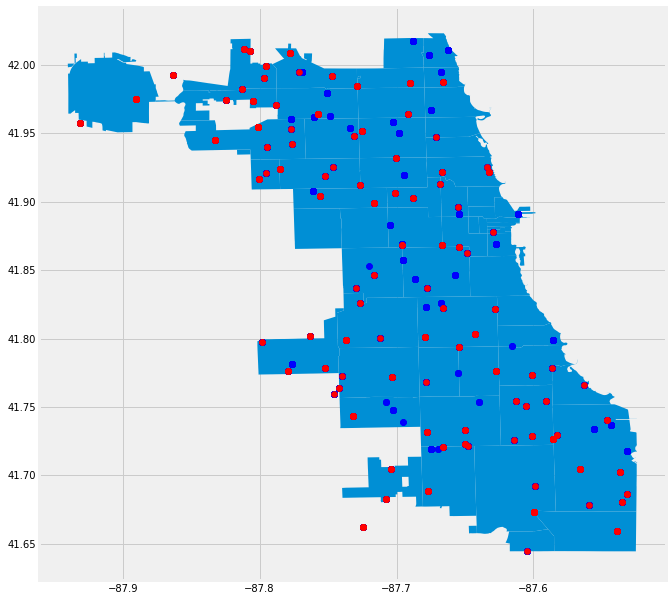

In [173]:
street_map = gpd.read_file('./Shape/geo_export_86c9e5b6-9fc3-4aed-931d-1515f724c6ee.shp')
fig,ax = plt.subplots(figsize=(10,15))
street_map.plot(ax=ax)
geo_df[geo_df['WnvPresent']==0].plot(ax=ax,color='blue',label='neg')
geo_df[geo_df['WnvPresent']==1].plot(ax=ax,color='red',label='pos')
#geo_df1.plot(ax=ax,color='grey')